#### <b>사전 학습된 BERT를 이용한 한국어 문장 임베딩</b>

* 사전 학습된 BERT를 이용해 한국어 문장 혹은 단어를 임베딩할 수 있다.
* <b>참조</b>: https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

#### <b>BERT란?</b>

* 2018년부터 대규모(large-scale) 모델에 대한 수요가 많아졌다.
* 특히 2018년에는 Google의 <b>BERT</b>가 출시되었다.
  * BERT는 다양한 작업(task)에 fine-tuning을 하기에 적합한 pre-trained 모델을 제공한다.
  * 텍스트 분류, 질의 응답 등에서 뛰어난 정확도를 보인다.

#### <b>BERT 임베딩(Embedding)이란?</b>

* BERT는 <b>(1) 문장(sentence)</b> 혹은 <b>(2) 단어(word)</b> 두 가지 모두에 대하여 <b>임베딩(embeddig)을 추출</b>할 수 있다.
* BERT는 문장 단위로 학습된 데이터라서, 문맥을 고려한 임베딩을 진행할 수 있다.
  * <b>Word2Vec</b>는 학습 이후에 추론할 때, 각 단어는 고정된(fixed) 임베딩 값을 가진다.
  * <b>BERT</b>는 학습 이후에 추론할 때, 각 단어의 임베딩은 주변 단어에 의하여 동적으로 변화한다.
* 예를 들어, 다음의 두 문장에서 "배"는 다른 의미로 임베딩된다.
  * 나는 학업으로 밤을 지새웠다.
  * 그는 마을 입구에 있는 밤나무 앞에 서 있었다.


#### <b>필요한 라이브러리 설치하기</b>

* 허깅 페이스(Hugging Face) 라이브러리를 사용하면 다양한 사전 학습된 Transformer 모델을 불러올 수 있다.

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00


#### <b>사전 학습된 BERT 불러오기</b>

* Tokenizer는 특정한 언어에 대한 단어집(vocabulary)과 같은 역할을 수행한다.
* 한국어 전용 Tokenizer인 <b>bert-base-multilingual-cased</b>를 사용할 수 있다.
  * 다양한 모델은 Hugging Face 공식 웹 사이트에서 확인할 수 있다.
  * <b>링크</b>: https://huggingface.co/models

In [4]:
import torch # PyTorch 라이브러리
from transformers import BertTokenizer # BERT를 위한 tokenizer 모델
from transformers import BertModel # BERT 모델

import matplotlib.pyplot as plt # 시각화 라이브러리

# 단어집(vocabulary) 기능을 수행하는 사전 학습된 tokenizer 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

#### <b>BERT의 입력 구조 알아보기</b>

* BERT의 경우 일반적으로 다음과 같은 입력 데이터를 사용한다.
* <b>\[CLS\]</b>: 첫 문장을 시작할 때 사용한다.
  * 일반적으로 텍스트 분류 모델을 만들 때, 이 <b>\[CLS\]</b> 토큰이 classification head의 입력으로 들어간다.
* <b>\[SEP\]</b>: 문장의 끝을 표시할 때 사용한다.
  * BERT는 최대 2개의 문장이 입력으로 들어올 수 있으며, 각 문장은 하나의 <b>구간(segment)</b>이 된다.
* <b>토큰 ID</b>: 단어 사전에 있는 각 단어에 대하여 고유한 번호가 부여된다.
* <b>마스크(Mask) ID</b>: 현재 시퀀스(sequence)에서 어떤 요소가 패딩(padding) 토큰인지를 나타낸다.
* <b>위치 임베딩(positional embedding)</b>: 시퀀스 내에서 각 토큰의 위치 정보를 담고 있는 임베딩이다.
  * 원본 Transformer 논문처럼 주기 함수를 단순히 그대로 사용할 수 있다.

#### <b>Special Tokens: \[CLS\]와 \[SEP\] 알아보기</b>

* BERT에서는 하나 혹은 두 개의 문장을 사용할 수 있다.
* 다음과 같은 문장이 입력되었다고 가정하자.
  * "나는 어제 학교에 늦게 도착했다. 저녁에는 야채죽을 먹을 예정이다."
* 이 경우, 다음과 같이 <b>특수 토큰(special tokens)이 반영</b>되어 입력으로 들어간다.
  * <b>\[CLS\]</b> 나는 어제 학교에 늦게 도착했다. <b>\[SEP\]</b> 저녁에는 야채죽을 먹을 예정이다.

#### <b>BERT의 Tokenizer 사용하기</b>

* 기본적으로 BERT는 영어를 처리하도록 설계되었으나, 한국어 tokenizer 기능도 존재한다.
* 간단히 <b>토큰화(tokenizing) 작업</b>을 수행해 볼 수 있다.

In [5]:
text = "나는 어제 학교에 늦게 도착했다."
processed = "[CLS]" + text + "[SEP]"

# 하나의 문장(sentence)을 BERT tokenizer를 사용해 토큰화할 수 있다.
tokenized = tokenizer.tokenize(processed)

# 토큰을 출력한다.
print(tokenized)

['[CLS]', '나는', '어', '##제', '학', '##교', '##에', '늦', '##게', '도', '##착', '##했다', '.', '[SEP]']


#### <b>토큰화 결과 예시 확인하기</b>

* BERT의 경우 <b>단어 조각(Word Piece) 기법</b>을 적용한다.
  * 하나의 단어(word)에 포함된 하위 단어(sub-word)를 고려한다.
  * 사전에 없는 단어에 단순히 <b>\[UNK\]</b> 토큰을 적용하는 대신, 하위 단어 및 개별 문자 토큰으로 분해한다.
* 한국어의 경우 BERT 모델이 단어 정보를 많이 가지고 있지 않다.
  * 현재 "학교"라는 단어를 <b>고유한 단어</b>로 가지고 있지 않다.
* 단어 사전(vocabulary)에서는 다음과 같은 정보를 활용한다.
  * <b>고유한 단어</b>: "나는"과 같은 단어를 말한다.
  * <b>하위 단어</b>: 뒤쪽에 붙는 하위 단어를 처리하기 위해 "##"가 앞에 붙는다.
  * 기타 개별적인 문자
* 현재 예시에서는 <b>"도착했다"</b>라는 단어가 고유한 단어로 존재하지 않는다.
  * 이는 구체적으로 \["도", "##착", "##했다"\]로 분해되었다.
  * 무엇을 "했다"는 의미로 이해할 수 있게 된다.

#### <b>Tokenizer로 인덱스로 변환하기</b>

* 컴퓨터는 문자열 데이터가 아닌 <b>수(number) 데이터</b>를 입력으로 받을 수 있다.
* 따라서, 하나의 텍스트(text)를 여러 개의 토큰(token)으로 분리한 뒤에 이를 수 리스트로 변환하여 사용한다.
  * <b>tokenizer.convert_tokens_to_ids(토큰 리스트)</b> 형태를 사용한다.

In [7]:
text = "나는 어제 학교에 늦게 도착해서 1교시 수업을 못 들었다."
processed = "[CLS]" + text + "[SEP]"

# 하나의 문장(sentence)을 BERT tokenizer를 사용해 토큰화할 수 있다.
tokenized = tokenizer.tokenize(processed)

# 토큰을 출력한다.
print(tokenized)

# 각 토큰(token)을 인덱스(index)로 매핑한다.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized)

# 각 토큰(token)별로 인덱스(index) 정보를 출력할 수 있다.
for (token, index) in zip(tokenized, indexed_tokens):
    print(f"{token}: {index}")

['[CLS]', '나는', '어', '##제', '학', '##교', '##에', '늦', '##게', '도', '##착', '##해서', '1', '##교', '##시', '수', '##업을', '못', '들', '##었다', '.', '[SEP]']
[CLS]: 101
나는: 100585
어: 9546
##제: 17730
학: 9953
##교: 25242
##에: 10530
늦: 9047
##게: 14153
도: 9087
##착: 119248
##해서: 70146
1: 122
##교: 25242
##시: 14040
수: 9460
##업을: 75203
못: 9290
들: 9117
##었다: 17706
.: 119
[SEP]: 102


#### <b>BERT의 구간 번호(Segment ID)</b>

* BERT는 최대 2개의 문장을 입력으로 받는다.
  * 따라서, 두 문장을 구별하기 위하여 0 혹은 1의 값으로 토큰을 마스킹한다.
  * 문장 0의 경우 <b>0의 값을 가진 리스트</b>로 표현하고, 문장 1의 경우 <b>1의 값을 가진 리스트</b>로 표현한다.
* 현재 실습에서는 단순히 문장 혹은 단어의 <b>임베딩(embedding)</b>을 구할 것이다.
  * 따라서, 단순히 각 토큰에 대하여 1의 값을 부여한다.

In [8]:
segments_ids = [1] * len(tokenized)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### <b>BERT 모델 불러오기</b>

* <b>허깅 페이스(Hugging Face)</b>에서 제공하는 모델을 불러와 사용할 수 있다.
  * 다운로드가 자동으로 수행된다.
  * 평가 모드(evalation mode)를 사용하여 드롭아웃과 같은 기법이 적절히 대응될 수 있도록 한다.

In [13]:
# 사전 학습된(pre-trained) 모델 가중치 불러오기
model = BertModel.from_pretrained('bert-base-multilingual-cased',
                                  # 모델이 모든 hidden state를 뱉도록 할 것인지 설정할 수 있다.
                                  output_hidden_states = True,
                                  )

# 모델을 평가(evaluation) 모드로 변경하여 feed-forward 역할을 수행하도록 한다.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

#### <b>임베딩(Embedding) 추출하기</b>

* 일반적으로 PyTorch의 임베딩(embedding) 레이어는 다음과 같이 동작한다.
  * <b>인덱스(index)</b>를 받아서 <b>원하는 차원(dimension)의 임베딩 벡터</b>로 변환한다.

In [12]:
text = "나는 어제 학교에 늦게 도착해서 1교시 수업을 못 들었다."
processed = "[CLS]" + text + "[SEP]"

# 하나의 문장(sentence)을 BERT tokenizer를 사용해 토큰화할 수 있다.
tokenized = tokenizer.tokenize(processed)

segments_ids = [1] * len(tokenized)

# 토큰을 출력한다.
print(tokenized)

# 각 토큰(token)을 인덱스(index)로 매핑한다.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized)

# 입력을 PyTorch의 텐서 형태로 변환한다.
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

['[CLS]', '나는', '어', '##제', '학', '##교', '##에', '늦', '##게', '도', '##착', '##해서', '1', '##교', '##시', '수', '##업을', '못', '들', '##었다', '.', '[SEP]']


* <b>BERT 모델</b>에 텍스트를 넣은 결과를 얻을 수 있다.
  * 구체적인 설명은 다음 링크에서 확인할 수 있다.
  * <b>설명 링크</b>: https://huggingface.co/transformers/model_doc/bert.html#bertmodel

In [14]:
# 텍스트를 BERT에 삽입한 뒤에, 생성된 hidden states를 모두 수집한다.
# 총 12개의 Transformer 레이어(layer)에 대한 결과를 모두 얻을 수 있다.
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # 아래 코드가 정상적으로 동작하려면, 정상적으로 BERT가 불러와져야 한다.
    # (1) from_pretrained가 수행되었다.
    # (2) output_hidden_states의 값이 True이므로, 세 번째 원소가 모든 레이어의 hidden states에 해당한다.
    hidden_states = outputs[2]

#### <b>출력된 임베딩 정보 확인하기</b>

* hidden_states는 다음과 같은 정보를 포함하고 있다.
  * <b>1번째 레이어</b>: 입력 토큰 임베딩 값을 포함한다.
  * <b>이후 12개의 레이어</b>: 각 Transformer 구조에서 출력된 토큰 임베딩 값을 포함한다.

In [18]:
# 총 13개의 레이어 (initial embeddings + 12 BERT layers)
print(f"레이어 개수: {len(hidden_states)}")

# 하나의 문장을 넣었으므로, 배치 크기는 1이다.
layer_index = 0
print(f"배치 크기: {len(hidden_states[layer_index])}")

# 자신이 입력한 문자열의 길이에 맞게 나온다.
batch_index = 0
print(f"토큰의 개수: {len(hidden_states[layer_index][batch_index])}")

# hidden units 개수는 768이다.
token_index = 0
print(f"임베딩 차원의 크기: {len(hidden_states[layer_index][batch_index][token_index])}")

레이어 개수: 13
배치 크기: 1
토큰의 개수: 22
임베딩 차원의 크기: 768


#### <b>토큰 임베딩 값 분석해 보기</b>

* 임베딩의 값이 대체로 \[-2, 2\] 범위 내에 다수 존재한다.

torch.Size([768])


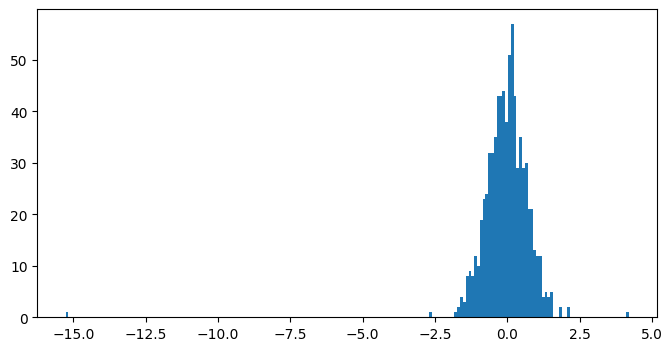

In [26]:
# 입력 문장에서 5번째 토큰에 대하여 특징을 추출해보자.
token_index = 5
layer_index = 5
vec = hidden_states[layer_index][batch_index][token_index]
print(vec.shape) # 768차원의 값을 가진다.

# 임베딩 값의 범위를 히스토그램(histogram) 분포로 그릴 수 있다.
plt.figure(figsize=(8, 4))
plt.hist(vec, bins=200)
plt.show()

#### <b>문장 혹은 단어의 임베딩(embedding) 추출하기</b>

* <b>13개의 레이어</b>에 걸쳐서 각 토큰마다 <b>768차원 임베딩 벡터</b>가 추출된다.
* 이것을 그대로 사용하기에는 너무 차원이 크다. (13 X 768)
  * 여러 레이어에 걸쳐 기록된 <b>정보를 종합</b>하여 압축된 임베딩을 만들 수 있을 것이다.

#### <b>임베딩 합치기</b>

* 마지막 4개의 레이어에 걸쳐서 토큰 임베딩 값을 합쳐서 <b>최종 임베딩</b>을 만들 수 있다.

In [29]:
# 총 13개의 레이어를 서로 연결하여(concatenate) 하나의 벡터로 만든다.
# 이러한 과정에서 새로운 축(axis)이 생성된다.
token_embeddings = torch.stack(hidden_states, dim=0)
print(token_embeddings.size()) # [13, 1, 22, 768]

# 인덱스 1에 해당하는 축(axis)을 제거한다. (batch 차원 제거)
token_embeddings = torch.squeeze(token_embeddings, dim=1)
print(token_embeddings.size()) # [13, 22, 768]

# 첫 번째 축과 두 번째 축을 서로 변환한다. (swapping)
# 구체적으로 layers 축과 tokens 축을 서로 변경한다.
token_embeddings = token_embeddings.permute(1, 0, 2)
print(token_embeddings.size()) # [22, 13, 768]

# 최종적인 토큰 임베딩 벡터를 구성할 것이다.
# 현재 입력 텍스트 예시에서는 [22 X 768] 형태의 벡터가 추출된다.
token_vecs_sum = []

# token_embeddings는 기본적으로 [22, 13, 768]의 형태를 가진다.
# 현재 문장의 각 토큰(token)을 하나씩 확인하며
for token in token_embeddings:

    # 하나의 토큰(token)은 [13 x 768] 크기의 텐서(tensor)다.
    # 마지막 4개의 레이어의 임베딩 값에 대하여 합치기 연산을 수행한다.
    sum_vec = torch.sum(token[-4:], dim=0)

    # 결과적으로 sum_vec은 해당 토큰(token)을 표현하는 768차원 벡터가 된다.
    token_vecs_sum.append(sum_vec)

print(f"Shape is: {len(token_vecs_sum)} x {len(token_vecs_sum[0])}")

torch.Size([13, 1, 22, 768])
torch.Size([13, 22, 768])
torch.Size([22, 13, 768])
Shape is: 22 x 768


#### <b>임베딩 추출 라이브러리 만들기</b>

* 앞서 설명한 방법으로 임베딩 추출을 위한 라이브러리를 생성할 수 있다.

In [33]:
def get_embeddings(tokenized):
    segments_ids = [1] * len(tokenized)

    # 각 토큰(token)을 인덱스(index)로 매핑한다.
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized)

    # 입력을 PyTorch의 텐서 형태로 변환한다.
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    # 텍스트를 BERT에 삽입한 뒤에, 생성된 hidden states를 모두 수집한다.
    # 총 12개의 Transformer 레이어(layer)에 대한 결과를 모두 얻을 수 있다.
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)

        # 아래 코드가 정상적으로 동작하려면, 정상적으로 BERT가 불러와져야 한다.
        # (1) from_pretrained가 수행되었다.
        # (2) output_hidden_states의 값이 True이므로, 세 번째 원소가 모든 레이어의 hidden states에 해당한다.
        hidden_states = outputs[2]

    # 총 13개의 레이어를 서로 연결하여(concatenate) 하나의 벡터로 만든다.
    # 이러한 과정에서 새로운 축(axis)이 생성된다.
    token_embeddings = torch.stack(hidden_states, dim=0)

    # 인덱스 1에 해당하는 축(axis)을 제거한다. (batch 차원 제거)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)

    # 첫 번째 축과 두 번째 축을 서로 변환한다. (swapping)
    # 구체적으로 layers 축과 tokens 축을 서로 변경한다.
    token_embeddings = token_embeddings.permute(1, 0, 2)

    # 최종적인 토큰 임베딩 벡터를 구성할 것이다.
    # 현재 입력 텍스트 예시에서는 [22 X 768] 형태의 벡터가 추출된다.
    token_vecs_sum = []

    # token_embeddings는 기본적으로 [22, 13, 768]의 형태를 가진다.
    # 현재 문장의 각 토큰(token)을 하나씩 확인하며
    for token in token_embeddings:

        # 하나의 토큰(token)은 [13 x 768] 크기의 텐서(tensor)다.
        # 마지막 4개의 레이어의 임베딩 값에 대하여 합치기 연산을 수행한다.
        sum_vec = torch.sum(token[-4:], dim=0)

        # 결과적으로 sum_vec은 해당 토큰(token)을 표현하는 768차원 벡터가 된다.
        token_vecs_sum.append(sum_vec)

    return token_vecs_sum

In [36]:
text = "나는 어제 학교에 늦게 도착해서 1교시 수업을 못 들었다."
processed = "[CLS]" + text + "[SEP]"

# 하나의 문장(sentence)을 BERT tokenizer를 사용해 토큰화할 수 있다.
tokenized = tokenizer.tokenize(processed)
embeddings = get_embeddings(tokenized)

print("토큰 길이:", len(tokenized))
print("추출된 임베딩 길이:", len(embeddings))
print("각 임베딩의 차원:", embeddings[0].shape)

토큰 길이: 22
추출된 임베딩 길이: 22
각 임베딩의 차원: torch.Size([768])


#### <b>임베딩 유사도 측정하기</b>

* 앞선 내용을 토대로 임베딩 유사도 라이브러리를 작성할 수 있다.
  * 단어간 유사도 분석을 위해 <b>get_word_cosine_similarity()</b>를 사용한다.
  * 문장간 유사도 분석을 위해 <b>get_text_cosine_similarity()</b>를 사용한다.

In [50]:
from scipy.spatial.distance import cosine


# 두 개의 토큰(token)에 대한 유사도 추출
def get_word_cosine_similarity(embedding_1, embedding_2):
    return 1 - cosine(embedding_1, embedding_2)


# 두 개의 문장(tokens)에 대한 유사도 추출
def get_text_cosine_similarity(embeddings_1, embeddings_2):
    embeddings_1 = torch.stack(embeddings_1, dim=0)
    embeddings_2 = torch.stack(embeddings_2, dim=0)

    # 각 문장마다 해당 문장에 들어있는 전체 토큰의 평균 임베딩 계산
    average_embedding_1 = torch.mean(embeddings_1, dim=0)
    average_embedding_2 = torch.mean(embeddings_2, dim=0)

    return 1 - cosine(average_embedding_1, average_embedding_2)


# 직접적으로 두 텍스트를 입력받아 유사도 분석하기
def get_similarity(text_1, text_2):
    processed_1 = "[CLS]" + text_1 + "[SEP]"
    processed_2 = "[CLS]" + text_2 + "[SEP]"

    tokenized_1 = tokenizer.tokenize(processed_1)
    tokenized_2 = tokenizer.tokenize(processed_2)

    embeddings_1 = get_embeddings(tokenized_1)
    embeddings_2 = get_embeddings(tokenized_2)

    return get_text_cosine_similarity(embeddings_1, embeddings_2)

In [60]:
text_1 = "나는 어제 학교에 늦게 도착해서 1교시 수업을 못 들었다."
text_2 = "나는 모든 수업에 성실히 참여하여 개근상을 받았다."
text_3 = "지각을 많이해서 선생님께 혼났다."
text_4 = "나는 항상 열정적으로 공부하고, 높은 성적을 받는다."

print("유사도:", get_similarity(text_1, text_1))
print("유사도:", get_similarity(text_1, text_2))
print("유사도:", get_similarity(text_1, text_3))
print("유사도:", get_similarity(text_1, text_4))

유사도: 1
유사도: 0.8627861142158508
유사도: 0.8967632055282593
유사도: 0.882111132144928


In [61]:
text_1 = "학교"
text_2 = "공부"
text_3 = "수영"
text_4 = "혹성탈출"

print("유사도:", get_similarity(text_1, text_1))
print("유사도:", get_similarity(text_1, text_2))
print("유사도:", get_similarity(text_1, text_3))
print("유사도:", get_similarity(text_1, text_4))

유사도: 1
유사도: 0.8520808219909668
유사도: 0.822685956954956
유사도: 0.7803860902786255


#### <b>리뷰 문장 비교하기</b>

* 리뷰 문장으로 비교해 볼 수 있다.

In [65]:
location_1 = "중국의 맛인 산시도삭면과 딤섬을 제대로 맛볼 수 있는 식당" # 식당
location_2 = "연어와 육회를 무한 리필로 술과 함께 먹을 수 있는 장소" # 식당
location_3 = "지역주민이 추천하는 로컬 맛집, 피자, 맥주와 함께" # 식당
location_4 = "63빌딩에 위치한 아쿠아리움" # 아쿠아리움

print("유사도:", get_similarity(location_1, location_1))
print("유사도:", get_similarity(location_1, location_2))
print("유사도:", get_similarity(location_1, location_3))
print("유사도:", get_similarity(location_1, location_4))

유사도: 1
유사도: 0.9112938642501831
유사도: 0.9079434871673584
유사도: 0.8674262762069702
